<a href="https://colab.research.google.com/github/IshaSinghVatsa/SpatioTempDA/blob/main/LAB3_STDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all the necessary libraries
from dataclasses import dataclass
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib as plt
import sklearn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv("/content/BRIGHTNESS_SORTED.csv", encoding= 'unicode_escape')
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight
0,36.88094,31.35661,367.0,0.32,0.54,2021-07-28,1011,low,362.57,0.00,Daytime
1,36.91619,31.50486,367.0,0.13,0.37,2021-07-29,1134,high,356.15,72.86,Daytime
2,36.87008,31.62774,367.0,0.13,0.37,2021-07-29,1134,high,335.66,127.47,Daytime
3,36.20307,33.27919,367.0,0.55,0.51,2021-07-29,11,high,339.81,74.01,Nighttime
4,36.83450,31.56425,367.0,0.43,0.46,2021-07-29,11,high,335.83,73.82,Nighttime


In [ ]:
df.isnull()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4570,False,False,False,False,False,False,False,False,False,False,False
4571,False,False,False,False,False,False,False,False,False,False,False
4572,False,False,False,False,False,False,False,False,False,False,False
4573,False,False,False,False,False,False,False,False,False,False,False



# Checking Null Values


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4575 entries, 0 to 4574
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    4575 non-null   float64
 1   longitude   4575 non-null   float64
 2   brightness  4575 non-null   float64
 3   scan        4575 non-null   float64
 4   track       4575 non-null   float64
 5   acq_date    4575 non-null   object 
 6   acq_time    4575 non-null   int64  
 7   confidence  4575 non-null   object 
 8   bright_t31  4575 non-null   float64
 9   frp         4575 non-null   float64
 10  daynight    4575 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 393.3+ KB


# Removing Duplicate Records and saving in new csv file

In [ ]:
with open('/content/BRIGHTNESS_SORTED.csv','r') as in_file, open('ouput.csv','w') as out_file:
    seen = set() # set for fast O(1) amortized lookup
    for line in in_file:
        if line in seen: 
          continue # skip duplicate
        seen.add(line)
        out_file.write(line)

In [ ]:
df_new = pd.read_csv("/content/ouput.csv", encoding= 'unicode_escape')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    4560 non-null   float64
 1   longitude   4560 non-null   float64
 2   brightness  4560 non-null   float64
 3   scan        4560 non-null   float64
 4   track       4560 non-null   float64
 5   acq_date    4560 non-null   object 
 6   acq_time    4560 non-null   int64  
 7   confidence  4560 non-null   object 
 8   bright_t31  4560 non-null   float64
 9   frp         4560 non-null   float64
 10  daynight    4560 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 392.0+ KB


# Grouping on the basis of Day and Night

In [ ]:

# applying groupby() function to
# group the data on team value.
gk = df_new.groupby('daynight')
# Let's print the first entries
# in all the groups formed.
gk.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight
0,36.88094,31.35661,367.0,0.32,0.54,2021-07-28,1011,low,362.57,0.00,Daytime
1,36.91619,31.50486,367.0,0.13,0.37,2021-07-29,1134,high,356.15,72.86,Daytime
2,36.87008,31.62774,367.0,0.13,0.37,2021-07-29,1134,high,335.66,127.47,Daytime
3,36.20307,33.27919,367.0,0.55,0.51,2021-07-29,11,high,339.81,74.01,Nighttime
4,36.83450,31.56425,367.0,0.43,0.46,2021-07-29,11,high,335.83,73.82,Nighttime
5,36.88400,31.55894,367.0,0.43,0.46,2021-07-29,11,high,326.87,135.83,Nighttime
6,36.91976,31.38612,367.0,0.63,0.54,2021-07-28,1011,high,349.84,130.48,Daytime
7,36.91115,31.50643,367.0,0.13,0.37,2021-07-29,1134,high,312.53,72.86,Daytime
9,37.58707,35.64428,367.0,0.13,0.36,2021-07-28,2231,high,300.01,5.47,Nighttime
11,36.88312,31.56294,367.0,0.43,0.46,2021-07-29,11,high,331.26,135.83,Nighttime


# Displaying only night time fire data

In [ ]:
gk.get_group('Nighttime')

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight
3,36.20307,33.27919,367.00,0.55,0.51,2021-07-29,11,high,339.81,74.01,Nighttime
4,36.83450,31.56425,367.00,0.43,0.46,2021-07-29,11,high,335.83,73.82,Nighttime
5,36.88400,31.55894,367.00,0.43,0.46,2021-07-29,11,high,326.87,135.83,Nighttime
9,37.58707,35.64428,367.00,0.13,0.36,2021-07-28,2231,high,300.01,5.47,Nighttime
11,36.88312,31.56294,367.00,0.43,0.46,2021-07-29,11,high,331.26,135.83,Nighttime
...,...,...,...,...,...,...,...,...,...,...,...
4549,38.66203,30.61357,295.60,0.70,0.75,2021-07-22,2242,nominal,284.00,0.70,Nighttime
4550,40.76730,32.21649,295.50,0.48,0.40,2021-07-25,2324,nominal,284.10,0.60,Nighttime
4551,40.75670,31.78230,295.30,0.54,0.68,2021-07-27,48,nominal,284.90,0.70,Nighttime
4552,39.58664,43.89973,295.21,0.13,0.36,2021-07-29,2212,nominal,284.98,0.60,Nighttime


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 116 kB 5.3 MB/s 
     |████████████████████████████████| 243 kB 38.1 MB/s 
     |████████████████████████████████| 2.4 MB 48.6 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 147 kB 53.0 MB/s 
     |████████████████████████████████| 41 kB 691 kB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 5.7 MB 42.2 MB/s 
     |████████████████████████████████| 60 kB 7.8 MB/s 
     |████████████████████████████████| 220 kB 72.4 MB/s 
     |████████████████████████████████| 1.0 MB 58.5 MB/s 
     |████████████████████████████████| 179 kB 55.3 MB/s 
     |████████████████████████████████| 2.1 MB 43.8 MB/s 
     |████████████████████████████████| 6.3 MB 41.2 MB/s 
     |████████████████████████████████| 16

In [ ]:
import matplotlib
import numpy as np
import pysal as ps
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Turkey Plot

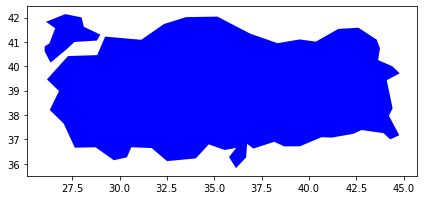

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
turkey = world[world['name'] == 'Turkey']
fig,ax = plt.subplots(figsize = (7,7))
turkey.plot(ax = ax, color='blue')


In [ ]:
new_df = pd.read_csv('/content/ouput.csv')
new_df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight
0,36.88094,31.35661,367.0,0.32,0.54,2021-07-28,1011,low,362.57,0.00,Daytime
1,36.91619,31.50486,367.0,0.13,0.37,2021-07-29,1134,high,356.15,72.86,Daytime
2,36.87008,31.62774,367.0,0.13,0.37,2021-07-29,1134,high,335.66,127.47,Daytime
3,36.20307,33.27919,367.0,0.55,0.51,2021-07-29,11,high,339.81,74.01,Nighttime
4,36.83450,31.56425,367.0,0.43,0.46,2021-07-29,11,high,335.83,73.82,Nighttime


In [ ]:
crs = {'init': 'epsg:4326'} #Coordinate Reference System
geometry = [Point(xy) for xy in zip( new_df["longitude"], new_df["latitude"])]
ports = gpd.GeoDataFrame(new_df, crs = crs, geometry = geometry)
ports.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,geometry
0,36.88094,31.35661,367.0,0.32,0.54,2021-07-28,1011,low,362.57,0.00,Daytime,POINT (31.35661 36.88094)
1,36.91619,31.50486,367.0,0.13,0.37,2021-07-29,1134,high,356.15,72.86,Daytime,POINT (31.50486 36.91619)
2,36.87008,31.62774,367.0,0.13,0.37,2021-07-29,1134,high,335.66,127.47,Daytime,POINT (31.62774 36.87008)
3,36.20307,33.27919,367.0,0.55,0.51,2021-07-29,11,high,339.81,74.01,Nighttime,POINT (33.27919 36.20307)
4,36.83450,31.56425,367.0,0.43,0.46,2021-07-29,11,high,335.83,73.82,Nighttime,POINT (31.56425 36.83450)


In [ ]:
bright=new_df.copy()

In [ ]:
bright=bright[bright['daynight']=='Nighttime']

In [ ]:
bright.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,geometry
3,36.20307,33.27919,367.0,0.55,0.51,2021-07-29,11,high,339.81,74.01,Nighttime,POINT (33.27919 36.20307)
4,36.83450,31.56425,367.0,0.43,0.46,2021-07-29,11,high,335.83,73.82,Nighttime,POINT (31.56425 36.83450)
5,36.88400,31.55894,367.0,0.43,0.46,2021-07-29,11,high,326.87,135.83,Nighttime,POINT (31.55894 36.88400)
9,37.58707,35.64428,367.0,0.13,0.36,2021-07-28,2231,high,300.01,5.47,Nighttime,POINT (35.64428 37.58707)
11,36.88312,31.56294,367.0,0.43,0.46,2021-07-29,11,high,331.26,135.83,Nighttime,POINT (31.56294 36.88312)


# Night Time Fire

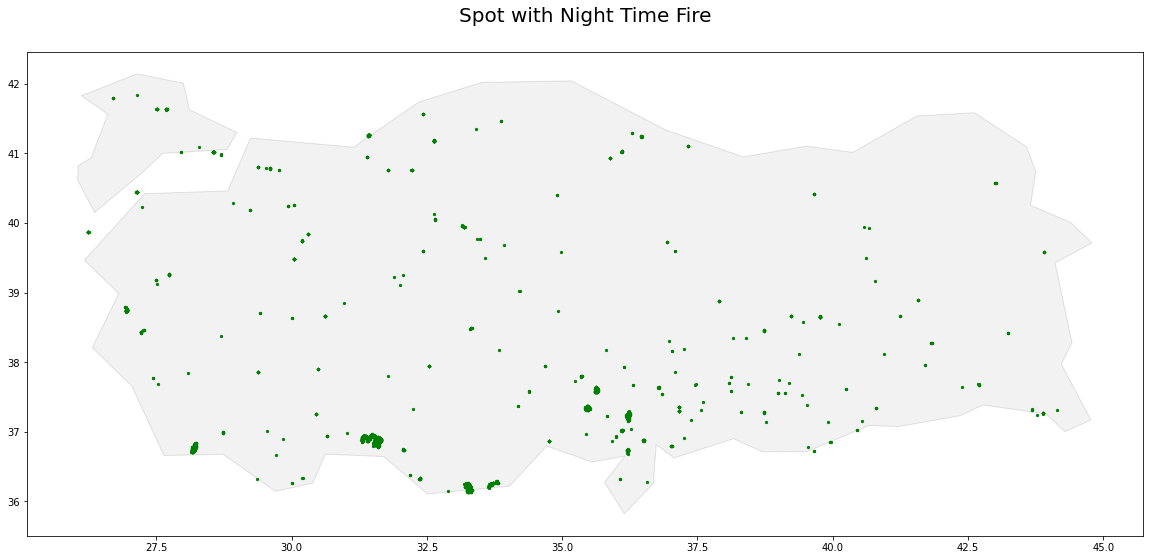

In [ ]:
fig,ax = plt.subplots(figsize = (20,50))
title = plt.title('Spot with Night Time Fire', fontsize=20)
title.set_position([0.5, 1.05])
turkey.plot(ax = ax, color='grey', edgecolor='black',linewidth=1, alpha=0.1)
ports.plot(marker='o', color='green', markersize=5, ax=ax)

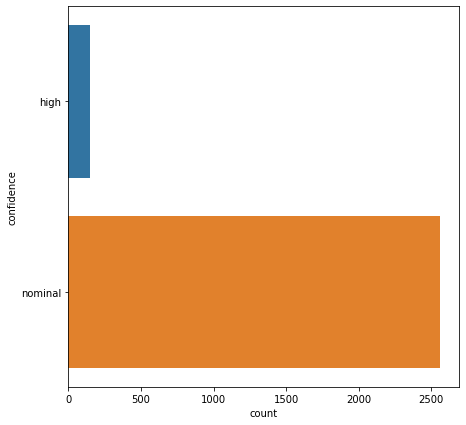

In [ ]:
import sklearn
import seaborn as sns

fig, ax = plt.subplots(1, figsize=(7,7))
sns.countplot(y="confidence", data=bright);